# Logistic Regression using Titanic Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tt = pd.read_csv('D:\\learning\\Refactored_Py_DS_ML_Bootcamp-master\\13-Logistic-Regression\\titanic_train.csv')


In [3]:
tt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
tt.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
tt.head(3)
# as we can see the survived column is having only 2 values , either 1 - survived or 0 - not survived . 
#So we will have a 2 Class regression model

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### The below are the column details
survival - Survival (0 = No; 1 = Yes) class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) name - Name sex - Sex age - Age sibsp - Number of Siblings/Spouses Aboard parch - Number of Parents/Children Aboard ticket - Ticket Number fare - Passenger Fare cabin - Cabin embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Data Cleaning


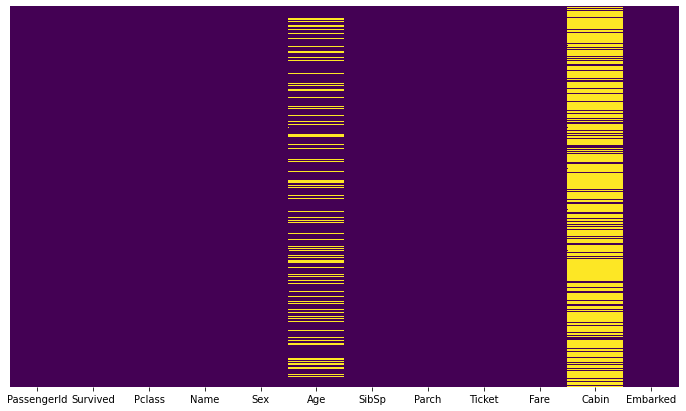

In [7]:
# let's find out null values present in tt (titanic dataset)
plt.figure(figsize=(12,7))
sns.heatmap(tt.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# we can see below that the age and cabin columns have null values 

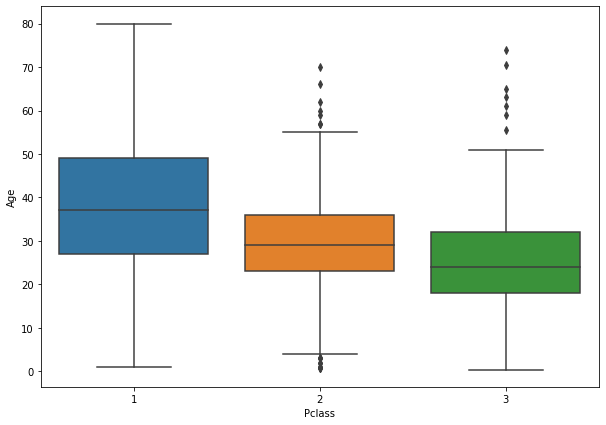

In [8]:
# Age column has only few null values and as they are important feature in predicting the survival lets try to fill up with dummies
# lets see if we can relate the Age with PClass
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=tt)

In [9]:
#Let's fill the null age values 
def fillAge(param):
    Age = param[0]
    Pclass = param[1]
    if(pd.isnull(Age)):
        if(Pclass == 1):
            return 37
        elif(Pclass == 2):
            return 29
        else:
            return 25
    else:
        return Age 

In [13]:
tt['Age'] = tt[['Age','Pclass']].apply(fillAge,axis=1)
#Now we have eliminated the null values in age 

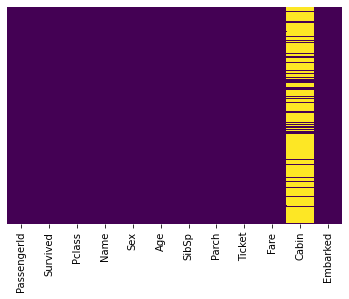

In [14]:
sns.heatmap(tt.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#As cabin is just having the string values , dropping them as they are not useful
tt.drop(columns='Cabin',inplace=True)

In [16]:
tt.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [17]:
#Lets create dummies for Sex and Embarked using pandas
sex = pd.get_dummies(tt['Sex'],drop_first=True)
#droppinf the first col as we know if male = 0 , it is a female

In [18]:
# we have just 3 chars in Embarked ,so Lets create dummies using pandas
embark = pd.get_dummies(tt['Embarked'],drop_first=True)

In [19]:
# Lets drop all unnecessary string values from tt
tt.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [20]:
# join the dummies
tt = pd.concat([tt,sex,embark],axis=1)

In [21]:
tt.head(3)
#data cleaning successful 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


## Create model


In [22]:
X = tt.drop(['Survived'],axis=1)
y = tt['Survived']

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [25]:
from sklearn.linear_model import LogisticRegression as lr


In [26]:
log_reg = lr().fit(X_train,y_train)


D:\learning\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
log_reg.coef_


array([[ 5.18406756e-04, -6.78058020e-01, -2.78602785e-02,
        -2.69204201e-01, -1.96828860e-01,  6.29190609e-03,
        -2.52894606e+00, -1.15243697e-01, -5.32660380e-02]])

In [28]:
pd.DataFrame(data=log_reg.coef_.reshape(-1,1),index=X.columns,columns=['Coeff'])


,Coeff
PassengerId,0.000518
Pclass,-0.678058
Age,-0.027860
SibSp,-0.269204
Parch,-0.196829
Fare,0.006292
male,-2.528946
Q,-0.115244
S,-0.053266


In [29]:
y_pred = log_reg.predict(X_test)


In [30]:
y_pred
#we have our predictions 

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## Accuracy Calculation


In [31]:
#lets use the Confusion Matrix to define Accuracy of our model
from sklearn.metrics import confusion_matrix


In [32]:
confusion_matrix(y_test,y_pred)


array([[162,  22],
       [ 36,  75]], dtype=int64)

In [33]:
cm = confusion_matrix(y_test,y_pred)


In [34]:
np.array(('TN=154','FP=18','FN=39','FP=84')).reshape(2,2)


array([['TN=154', 'FP=18'],
       ['FN=39', 'FP=84']], dtype='<U6')

In [35]:
#now we can calcuate the precision , recall and F-measure values from confusion matrix
# lets use sklearn to generate a report on predicted and actual values
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       184
           1       0.77      0.68      0.72       111

    accuracy                           0.80       295
   macro avg       0.80      0.78      0.78       295
weighted avg       0.80      0.80      0.80       295

